# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


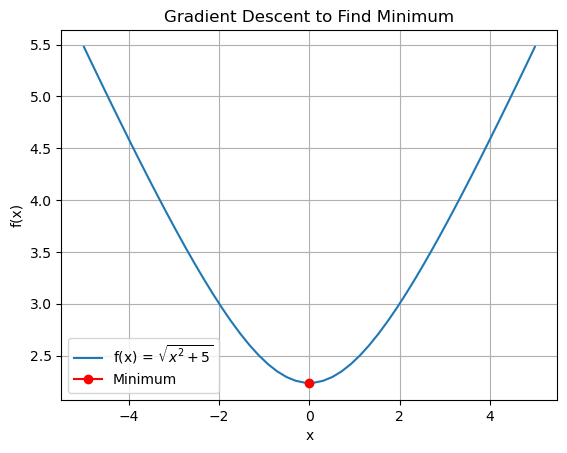

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x).
def function(x):
    y = np.sqrt(x**2 + 5)
    return y


# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5,5,50)
points = function(x)
plt.plot(x,points,label = 'f(x) = ' r"$\sqrt{x^2 + 5}$") #Using Latex to write math problems
plt.plot(function(0), marker = 'o', color = 'red', label = 'Minimum' )
plt.title('Gradient Descent to Find Minimum')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 'lower left')





1.144406816559235
range(0, 51)
(51,)


Text(0, 0.5, 'f($x_k$)')

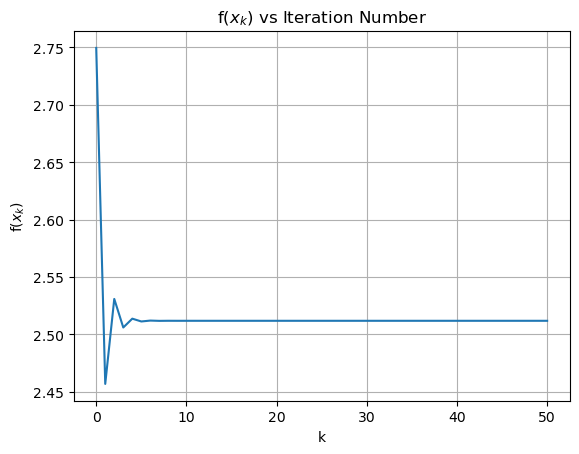

In [44]:
# Define the derivative of the function f(x), for gradient descent
def derivative(x):
    y = (x/np.sqrt(x**2 + 5))
    return y

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def GD(x_0, step_size, num_iterations):
    l = x_0
    x_values = [x_0]
    for i in range(num_iterations): 
        gradient = derivative(l)
        l = x_0 - step_size * gradient
        x_values.append(l)
    return x_values

# set up/assign initial values
x_0 = 1.6
step_size = 1
num_iterations = 50
# Run gradient descent by calling the function
GD(x_0,step_size,num_iterations)
# report x_T by printing out the value
fxk = GD(x_0,step_size,num_iterations)
print(fxk[49])
#Takes the x_k values and runs them in the function to get the f(x_k) values
fxk_values = list()
def convert(fxk_values,fxk):
    for i in range(len(fxk)): 
        r = function(fxk[i])
        fxk_values.append(r)
    return fxk_values
# Plot the f(x_k) values vs. iteration number
convert(fxk_values,fxk)
iterations = range(0,51)
print(iterations)
print(np.shape(iterations))
plt.plot(iterations,fxk_values)
plt.title(r'f($x_k$) vs Iteration Number')
plt.grid(True)
plt.xlabel('k')
plt.ylabel(r'f($x_k$)')





Text(0, 0.5, 'f($x_{k-1}$)-f($x_k$)')

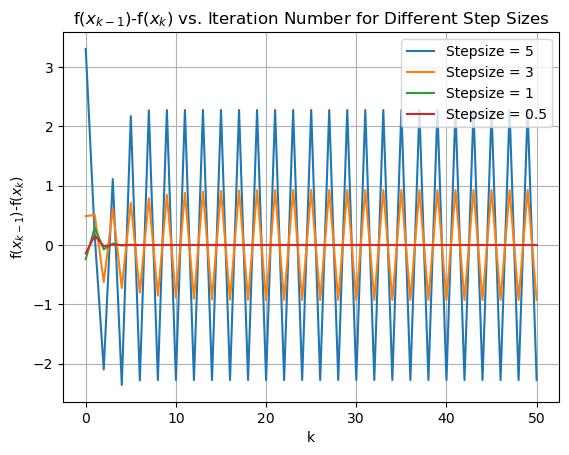

In [45]:
# create a list containing step sizes

step_size = [5, 3, 1, 0.5]
# initialize a list to store the results from different step sizes
results5 = GD(x_0,step_size[0],num_iterations)
results3 = GD(x_0,step_size[1],num_iterations)
results_frac = GD(x_0,step_size[3],num_iterations)
# loop through the step sizes and perform GD and record results
fx5_values = list()
convert(fx5_values,results5)
fx3_values = list()
convert(fx3_values,results3)
fx_frac_values = list()
convert(fx_frac_values,results_frac)
# Create a function that subtracts values in a list
z = list()
z_new = list()
def subtract(z, z_new):
    for i in range(len(z)):
        r = z[i-1] - z[i]
        z_new.append(r)
    return z
# Create an array of values implementing the function
fx5_plot = list()
subtract(fx5_values,fx5_plot)
fx3_plot = list()
subtract(fx3_values,fx3_plot)
fxk_plot = list()
subtract(fxk_values,fxk_plot)
fx_frac_plot = list()
subtract(fx_frac_values,fx_frac_plot)

# plot multiple curves in a single graph
plt.plot(iterations,fx5_plot,label = 'Stepsize = 5')
plt.plot(iterations,fx3_plot, label = 'Stepsize = 3' )
plt.plot(iterations,fxk_plot, label = 'Stepsize = 1')
plt.plot(iterations,fx_frac_plot, label = 'Stepsize = 0.5')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.title(r'f($x_{k-1}$)-f($x_k$) vs. Iteration Number for Different Step Sizes')
plt.xlabel('k')
plt.ylabel(r'f($x_{k-1}$)-f($x_k$)')

Based on my examination of this plot f($x_k$) is not always decreasing. Taking the difference between the previous and proceeding values (f($x_{k-1}$) - f($x_k$)) for the different step sizes shows a plot that fluctuates between positive and negative values, which means that the function isn't decreasing. If the function was decreasing, each of the plotted differences would be positive, but this isn't the case.

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.132335643613044
Coefficients: [3.81222053 0.5047984 ]


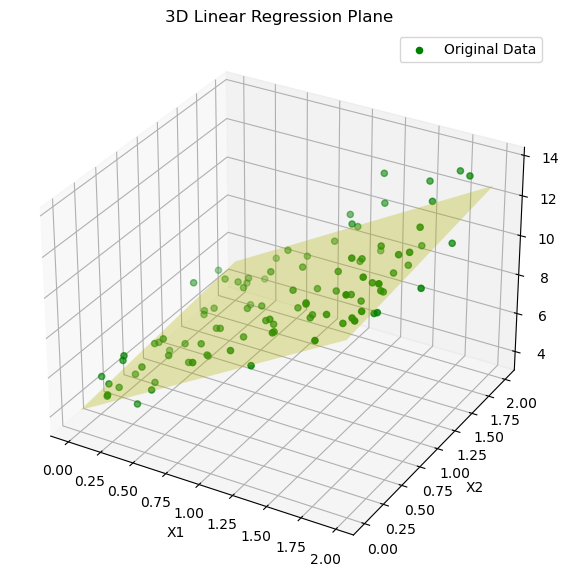

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(23)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for the bias term

# Find theta using the normal equation: theta = (X^T * X)^-1 * X^T * y
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane
intercept = theta[0]
coefficients = theta[1:]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Plot the generated data and the regression plane

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with a label for the legend
ax.scatter(X[:, 0], X[:, 1], y, color='green', label='Original Data')

# Create a meshgrid for the plane
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)

# Calculate the corresponding y values for the plane
y_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='y', alpha=0.3, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('3D Linear Regression Plane')

# Add the legend for the data points
ax.legend()

# Show plot
plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

Epoch 0, Loss: 0.6931
Epoch 10, Loss: 0.6619
Epoch 20, Loss: 0.6446
Epoch 30, Loss: 0.6328
Epoch 40, Loss: 0.6232
Epoch 50, Loss: 0.6147
Epoch 60, Loss: 0.6068
Epoch 70, Loss: 0.5993
Epoch 80, Loss: 0.5921
Epoch 90, Loss: 0.5851
Epoch 100, Loss: 0.5784
Epoch 110, Loss: 0.5718
Epoch 120, Loss: 0.5655
Epoch 130, Loss: 0.5594
Epoch 140, Loss: 0.5535
Epoch 150, Loss: 0.5478
Epoch 160, Loss: 0.5422
Epoch 170, Loss: 0.5368
Epoch 180, Loss: 0.5316
Epoch 190, Loss: 0.5265

Training Set Accuracy: 0.75
Test Set Accuracy: 0.90


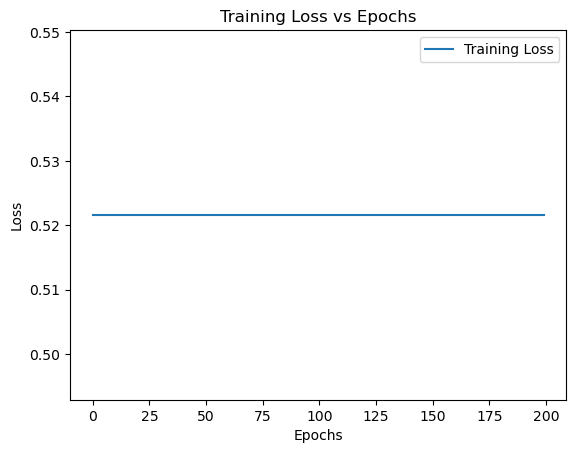

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Set random seed for reproducibility
np.random.seed(595)

# Generate synthetic data for 2D classification problem
X = np.random.rand(2, 100)  # 2 features (input data) for 100 samples
w_true = np.array([1.5, -2.5])  # True weights
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)  # Probabilities using the true weights and bias
Y = (probabilities > 0.5).astype(int)  # Binary target labels (0 or 1)
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)  # Add noise to X

# Split the data into training and testing sets
X_train, X_test = X[:, :80], X[:, 80:]  # First 80 samples for training, remaining for testing
Y_train, Y_test = Y[:80], Y[80:]  # Corresponding labels for train and test

# Initialize parameters (weights and bias)
w = np.zeros(X.shape[0])  # Weights initialized to zeros
b = 0.0  # Bias initialized to zero

# Hyperparameters
learning_rate = 0.10  # Learning rate (to be fine-tuned)
num_epochs = 200  # Number of epochs (to be fine-tuned)

# Training loop: Gradient Descent
for epoch in range(num_epochs):
    # Forward propagation: Compute the predicted probabilities
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute the gradients of the loss function (cross-entropy loss)
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)  # Gradient with respect to weights
    dJdb = np.mean(A_train - Y_train)  # Gradient with respect to bias

    # Update the parameters using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

    # Optional: Print the training progress (every 10 epochs)
    if epoch % 10 == 0:
        loss = -np.mean(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))  # Cross-entropy loss
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# After training, make predictions for both training and test sets
A_train = sigmoid(np.dot(w.T, X_train) + b)  # Predictions on the training set
predictions_train = (A_train > 0.5).astype(int)  # Convert probabilities to binary predictions

A_test = sigmoid(np.dot(w.T, X_test) + b)  # Predictions on the test set
predictions_test = (A_test > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the accuracy of the model on the training and test sets
train_accuracy = np.mean(predictions_train == Y_train)  # Training accuracy
test_accuracy = np.mean(predictions_test == Y_test)  # Test accuracy

# Print out the results
print(f"\nTraining Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Optionally, plot the training progress (Loss over epochs)
# We'll track loss over epochs for better visualization

losses = []
for epoch in range(num_epochs):
    A_train = sigmoid(np.dot(w.T, X_train) + b)
    loss = -np.mean(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))
    losses.append(loss)

# Plot the loss over epochs
plt.plot(range(num_epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()


The plot here demonstrates the range of acceptable parameters to use to make a valuable prediction. According to the literature, a good range for learning rates range between 0 and 1. Moreover, the acceptable ranges for number of epoch appear to range between 0 and 200. The graph suggests what the best possible range is to minimize the loss function. In my program I have provided results taht have given me very similar results for training and testing accuracy.

source: https://datascience.stackexchange.com/questions/410/choosing-a-learning-rate 

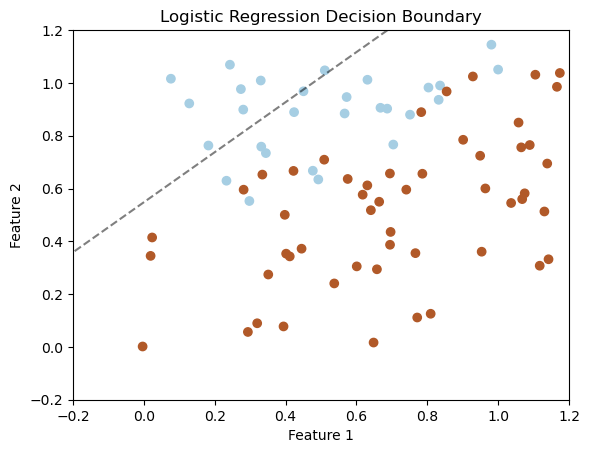

In [80]:

# Scatter plot of the training data
# X[0, :80] -> first feature of the training set (80 samples)
# X[1, :80] -> second feature of the training set (80 samples)
# c=Y[:80] -> color points based on the labels (0 or 1)
# cmap=plt.cm.Paired -> use a predefined colormap to distinguish classes
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)

# Set the limits for the x and y axes to define the plot range
plt.xlim(-0.2, 1.2)  # X-axis range from -0.2 to 1.2
plt.ylim(-0.2, 1.2)  # Y-axis range from -0.2 to 1.2

# Get the current axes (the plot area)
ax = plt.gca()

# Get the limits of the axes (xlim and ylim) to create a mesh grid
xlim = ax.get_xlim()  # Get the x-axis limits
ylim = ax.get_ylim()  # Get the y-axis limits

# Create a grid of points that spans the entire plotting area
# np.linspace generates linearly spaced values between the min and max values of xlim and ylim
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute the decision boundary for the logistic regression model
# We use np.c_ to stack the grid points (xx and yy) column-wise
# Then, we calculate the predicted values (Z) using the logistic regression model: 
# Z = w.T * X + b
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b  # Linear combination

# Apply the sigmoid function to the linear combination to get probabilities
Z = sigmoid(Z)

# Reshape Z to match the shape of the meshgrid for contour plotting
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a contour plot
# plt.contour draws contour lines, in this case the decision boundary at Z = 0.5 (threshold)
# colors='k' -> black contour line
# levels=[0.5] -> Contour line at Z = 0.5, which is the decision boundary
# alpha=0.5 -> semi-transparent contour lines
# linestyles=['--'] -> dashed lines for the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# Label the axes and title
plt.xlabel('Feature 1')  # Label for the x-axis
plt.ylabel('Feature 2')  # Label for the y-axis
plt.title('Logistic Regression Decision Boundary')  # Title for the plot

# Show the plot
plt.show()


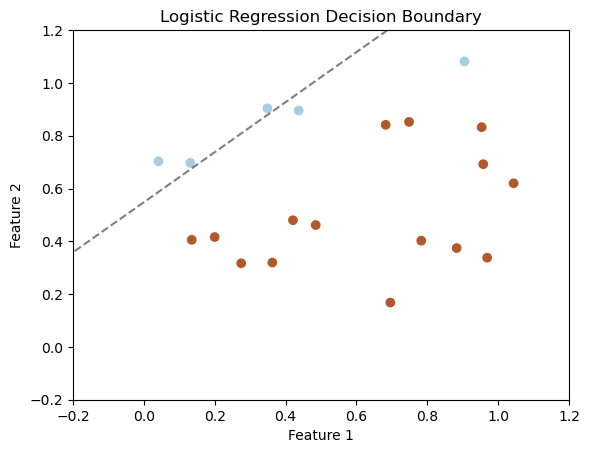

In [ ]:

# Scatter plot of the test data
# X[0, 80:] -> first feature of the test set (samples from 80 to 99)
# X[1, 80:] -> second feature of the test set (samples from 80 to 99)
# c=Y[80:] -> color points based on the labels of the test set (0 or 1)
# cmap=plt.cm.Paired -> use a predefined colormap to distinguish classes
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)

# Set the limits for the x and y axes to define the plot range
plt.xlim(-0.2, 1.2)  # X-axis range from -0.2 to 1.2
plt.ylim(-0.2, 1.2)  # Y-axis range from -0.2 to 1.2

# Get the current axes (the plot area)
ax = plt.gca()

# Get the limits of the axes (xlim and ylim) to create a mesh grid
xlim = ax.get_xlim()  # Get the x-axis limits
ylim = ax.get_ylim()  # Get the y-axis limits

# Create a grid of points that spans the entire plotting area
# np.linspace generates linearly spaced values between the min and max values of xlim and ylim
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute the decision boundary for the logistic regression model
# We use np.c_ to stack the grid points (xx and yy) column-wise
# Then, we calculate the predicted values (Z) using the logistic regression model: 
# Z = w.T * X + b
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b  # Linear combination

# Apply the sigmoid function to the linear combination to get probabilities
Z = sigmoid(Z)

# Reshape Z to match the shape of the meshgrid for contour plotting
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a contour plot
# plt.contour draws contour lines, in this case the decision boundary at Z = 0.5 (threshold)
# colors='k' -> black contour line
# levels=[0.5] -> Contour line at Z = 0.5, which is the decision boundary
# alpha=0.5 -> semi-transparent contour lines
# linestyles=['--'] -> dashed lines for the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# Label the axes and title
plt.xlabel('Feature 1')  # Label for the x-axis
plt.ylabel('Feature 2')  # Label for the y-axis
plt.title('Logistic Regression Decision Boundary')  # Title for the plot

# Show the plot
plt.show()


## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5